# T018 · Performance of ligand-based machine learning methods for the classification of active/inactive compounds, considering various validation approaches

Supervisior:

* JProf. Dr. Andrea Volkamer; AG Volkamer:  Institut für Physiologie - Charité Universitätsmedizin


Author:

* Hee-yeong Kim; WiSe20/21; Freie Universität Berlin; Bioinformatik (M.Sc.)

## Aim of this project work
Currently, the application and evaluation of Machine Learning (ML) based approaches, especially in the field of CADD is still state-of-art.

* Search for appropriate strategies for QSAR models applied on chemical compounds.
* Assess the performance and predictive power of ML-methods.
* Splitting schemes: cluster-based split approaches and cross validation (CV) by random and time-split.
* Compare the different splitting methods and observe the performance of the models based on some performance metrics.

## General Workflow of this Notebook

<img src="images/workflow.png" width="800" height="600">


## Theory

### Biological Background
#### Epidermal growth factor receptor (EGFR)
* Transmembrane glycoprotein is located at the cell surface and binds to epidermal growth factor.
* Activated by binding to a ligand, which induces cell proliferation and prevents the apoptotic cell death. * Mutations are associated with a number of cancers (non-small cell lung cancer (NSCLC) (40-80%), glioblastoma, head and neck cancer as well as breast cancer (25-30%) [EGFR_]).
* Importance of its investigation for research and therapeutic issues.

Computer-Aided Drug Design (CADD) uses computational approaches to discover, enhance, develop and analyze drugs and similar biologically active molecules. It can be described by three major approaches: ligand-based, structure-based and system-based drug discovery methods.

* Ligand-based approach: Structural similar molecules have similar properties and thus similar biological activity.
* Prediction of active and inactive compounds (activation or inhibition of the target protein).

### Data Aquisition and preparation
For the data aquisition and filtering step, the preimplemented talktorials, 001_query_chembl and 002_compound_adme, provided by the research group of Volkamer Lab (https://github.com/volkamerlab) were used. Talktorial 007_compound_activity_machine_learning is used as framework of this notebook and functions for Butina Clustering are taken from 005_compound_clustering.

After having chosen the target data (EGFR Kinase: P00533) the bioactivity information and the compounds (ChEMBL ID, SMILES) were fetched and downloaded from ChEMBL data base. The resulting dataframe was then used to filter the compounds according to Lipinski's Rule of Five, to estimate the bioavailability of compounds solely based on their chemical structure. Compounds were selected as candidates for further investigation if not more than one rule was violated.
The final composed EGFR data set comprises following parameters for each compound:

* CHEMBL-ID
* Publishing year
* SMILES representation (Simplified Molecular Input Line Entry Specification)
* pIC50 value: -log10(IC50), with IC50 = Concentration of a drug to inhibit a process by 50% (in vitro).
* Molecular weight
* Number of hydrogen bond acceptors (HBAs)
* Number of hydrogen bond donors (HBDs)
* log(p) (octanol-water coefficient): Used as measure of hydrophobicity.

#### Molecule encoding
It is a crucial step in CADD to encode the molecules to an abstract and interpretable representation for the computer while keeping important information of certain structural properties. Usually, molecular fingerprints are used to describe small molecules and are represented by bit vectors, where each fingerprint bit corresponds to a fragment of the molecule.

<img src="images/fp_.png" width="400" height="400">

RDKit provides various functions generating molecular fingerprints [S1]. The method section here is done with MACCS only, a comparision of the ML-methods between MACCS and Morgan is withdrawable from 007.

MACCS keys are 166 bit structure fingerprints, where each bit corresponds to a predefined structural feature (substructure or fragment). In contrast, Morgan fingerprints - also known as Extended-Connectivity Fingerprints (ECFPs) - are circular topological fingerprints, generated by considering the “circular” environment of each atom up to a given radius or diameter (see [S2] for a general overview of molecular descriptor types).

### Machine Learning (ML) Approaches

In Machine Learning, supervised learning describes methods to learn the mapping function from the input to the output. The goal is to approximate the mapping function good enough, to predict for new input data the output variables with a specific accuracy.

The here introduced ML-appraoches are commonly used in drug discovery, consisting of:

* **Random Forest (RF)**: 
* **Support Vector Machine (SVM)**: 

### Data Splitting Schemes
The use of Machine Learning methods to overcome financial restrictions, limited scoures or more sophisticated problems in medicine and economy, increased over the last decades. Therefore more advanced techniques were developed with high performance, like CNNs but still represent an incomprehensible black box in their decision making process. This brought up the need for approaches to infer the performance of the models and assess their reliability and 'realistic' predictive power on new data.

#### Role of Train/Test and Validation Set in ML
The data we want to predict on is usually divided in three parts:

* Training Set: Train the model by fitting on the data.

* Validation Set: Validation of the performance of the models is tested and used to adjust the model hyperparameters (e.g. number of layers in an NN).

* Test Set: Evaluate the performance on unlabeled data to assess their true performance. Usually used to compare models.

In our case, the role of validation and test sets are identical, since this project does not aim to compare the models itself but assess their performance depending on the data splitting scheme.

#### Random Splitting Schemes
* **Single random Split**: As the name already implies, it splits the data into train and test set by a given percentage. Usually, a split of 80% for train and 20% for test is applied.

* **k-fold Cross Validation (CV)**: The data is partitioned into k folds. In each of the k partitions, k-1 parts are used as training set, while the remaining k-th part serves as test set.

<img src="images/cv.png" width="500" height="500">

#### Time-based Splitting
* Type of Cross Validation to deal with time-related data (data is sorted by time in ascending order).
* Splits train/test sets in a 'sliding window' approach.
* In each split, the test indices must be higher than before.
* Simulating the process of prospective validation [].

<img src="images/timesplit_cv.png" width="250" height="250">

Scikit-learn has a TimeSeriesSplit method with the main drawback, that the splitting process is not interferable. Therefore two functions are implemented in this notebook, a naive (recommended) implementation and another version, where the splits are infered such that the train and test sets are disjoint w.r.t. the year.

#### Cluster-based Splitting

General idea is to use an algorithm to cluster the compounds based on their sturctural features to get: 
* Train/validation set: Largest clusters are used to cover a wide chemical space.
* Test set: Small remaining clusters and/or singletons are used to provide a 'realistic' model evaluation with unseen, structural most diverse molecules.

**Algorithms**:

1. **Butina Clustering** [butina1999]: Clustering technique based on fingerprints and tanimoto similarity.

<img src="images/butina.png" width="850" height="700" align="center"/>

* Convert SMILES to Fingerprints (maccs)
* Calculate Tanimoto dissimilarity matrix (1-similarity)
* Cluster the molecules based on exclusion spheres using RDKit _Butina.ClusterData()_.
* Assign the compound from the clusters to train and test set with an ratio approximately 80:20.


2. **K-means**: Is a very common clustering technique, that aims to partition n observations into k clusters, where each observation belongs to the cluster with the smallest (euclidian) distance.

<img src="images/kmeans.png" width="600" height="400">

* Convert SMILES to a set of physicochemical properties (=200).
* Cluster the molecules based on the properties using Scikit-learn _KMeans()_ function.
* Choose an appropiate initial k (empirically or elbow method)
* Assign the compound from the clusters to train and test set with ratio approximately 80:20.

### Performance metrics

* **Accuracy**: ACC = (TP + TN)/(TP + TN + FP + FN)
Informal: 

* **Sensitivity**: TruePositiveRate = TP/(FN + TP)
Informal: 

* **Specificity**: TrueNegativeRate = TN/(FP + TN)
Informal: 

* **Area under the ROC curve (AUC)**:


* **Receiver operating characteristic (ROC) Curve Plot**:

## Practice and Results

In [2]:
import pandas as pd
import numpy as np
import math
#Molecule Encoding
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
#ML-approaches
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#CV and Random Division
from sklearn.model_selection import KFold, train_test_split, cross_validate
#Time-split CV
from sklearn.model_selection import TimeSeriesSplit
#Cluster-based splits
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.cluster import KMeans
import kneed
from kneed import KneeLocator #find optimal number of cluster centers for kmeans
#Performance Metrics
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
#Plotting
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
#Display Images
from IPython.display import Image

In [3]:
#global parameter(s)
SEED = 22 #fixed seed for reproducible results
N_FOLDS = 10 #for random- and time-split CV
cut_off = 0.1 #for similarity-based clustering

### 1. Load compound data

In [4]:
path_to_data = 'data/EGFR_compounds_lipinski_timeseries.csv'
chembl_df = pd.read_csv(path_to_data, index_col=0)

print("Number of molecules : ", chembl_df.shape[0])
print("Number of features : ", chembl_df.shape[1])

Number of molecules :  4493
Number of features :  11


In [4]:
# Keep only the columns we want
chembl_df = chembl_df.drop(columns=["IC50","units","ro5_fulfilled"])
#convert document_year to int
chembl_df["document_year"] = chembl_df["document_year"].astype(int)
chembl_df.head()

,molecule_chembl_id,document_year,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp
0,CHEMBL63786,1996,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891
1,CHEMBL53711,1998,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969
2,CHEMBL35820,1997,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333
3,CHEMBL66031,1999,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.0122
4,CHEMBL53753,1999,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.5726


### 2. Data preparation

#### Data labeling
Classify each compound as active or inactive based on the pIC50 value.

A common cut-off value to discretize pIC50 data is 6.3, which is also used here.
Note that there are several other suggestions for an activity cut-off ranging from an pIC50 value of 5 to 7 in the literature. 

In [5]:
# Add column for activity
chembl_df["activity"] = np.zeros(len(chembl_df))

# Assign binary activity score (activity = 1)
chembl_df.loc[chembl_df[chembl_df.pIC50 >= 6.3].index, "activity"] = 1.0

print("Number of active compounds:", int(chembl_df.activity.sum()))
print("Number of inactive compounds:", len(chembl_df) - int(chembl_df.activity.sum()))
chembl_df.head()

Number of active compounds: 2555
Number of inactive compounds: 1938


,molecule_chembl_id,document_year,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,activity
0,CHEMBL63786,1996,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891,1.0
1,CHEMBL53711,1998,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969,1.0
2,CHEMBL35820,1997,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333,1.0
3,CHEMBL66031,1999,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.0122,1.0
4,CHEMBL53753,1999,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.5726,1.0


#### Molecule encoding

In [6]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    # convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)
    if method == "morgan2":
        return GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    if method == "morgan3":
        return GetMorganFingerprintAsBitVect(mol, 3, nBits=n_bits)
    else: #default maccs
        return MACCSkeys.GenMACCSKeys(mol)

In [7]:
compound_df = chembl_df.copy()

In [8]:
# Add column for fingerprint
compound_df["fp_maccs"] = compound_df["smiles"].apply(smiles_to_fp)
compound_df.head(3)

#Command to calc. another fp type
#compound_df["fp_morgan2"] = compound_df["smiles"].apply(smiles_to_fp, args=('morgan2',))

,molecule_chembl_id,document_year,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,activity,fp_maccs
0,CHEMBL63786,1996,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL53711,1998,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL35820,1997,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### 3. Methods

#### 3.1 Machine Learning (ML) Models

In [9]:
#Set model parameter
param = {
    "n_estimators": 100,  # number of trees
    "criterion": "entropy",  # cost function
}
model_RF = RandomForestClassifier(**param)
models = [{"label": "Model_RF", "model": model_RF}]

model_SVM = svm.SVC(kernel="rbf", C=1, gamma=0.1, probability=True)
models.append({"label": "Model_SVM", "model": model_SVM})

#### 3.2 Model evaluation

In [10]:
def model_performance(ml_model, test_x, test_y, verbose=True):
    # Prediction probability on test set
    test_prob = ml_model.predict_proba(test_x)[:, 1]

    # Prediction class on test set
    test_pred = ml_model.predict(test_x)

    # Performance of model on test set
    accuracy = accuracy_score(test_y, test_pred)
    sens = recall_score(test_y, test_pred)
    spec = recall_score(test_y, test_pred, pos_label=0)
    auc = roc_auc_score(test_y, test_prob)

    if verbose:
        print(f"Sensitivity: {sens:.2f}")
        print(f"Specificity: {spec:.2f}")
        print(f"AUC: {auc:.2f}")

    return accuracy, sens, spec, auc

In [11]:
def plot_roc_curves_for_models(models, test_x, test_y, save_png=False):
    fig, ax = plt.subplots()

    # Below for loop iterates through your models list
    for model in models:
        # Select the model
        ml_model = model["model"]
        # Prediction probability on test set
        test_prob = ml_model.predict_proba(test_x)[:, 1]
        # Prediction class on test set
        test_pred = ml_model.predict(test_x)
        # Compute False postive rate and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(test_y, test_prob)
        # Calculate Area under the curve to display on the plot
        auc = roc_auc_score(test_y, test_prob)
        # Plot the computed values
        ax.plot(fpr, tpr, label=(f"{model['label']} AUC area = {auc:.2f}"))

    # Custom settings for the plot
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc="lower right")
    # Save plot
    if save_png:
        fig.savefig("roc_auc_"+str(ml_model), dpi=300, bbox_inches="tight", transparent=True)
    return fig

In [12]:
def plot_roc_curves_for_singlemodel(ml_model, test_x, test_y, model_type, title_, save_png=False):
    fig, ax = plt.subplots()
        
    for i in range(len(test_x)):
        # Prediction probability on test set
        test_prob = ml_model.predict_proba(test_x[i])[:, 1]
        # Prediction class on test set
        test_pred = ml_model.predict(test_x[i])
        # Compute False postive rate and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(test_y[i], test_prob)
        # Calculate Area under the curve to display on the plot
        auc = roc_auc_score(test_y[i], test_prob)
        # Plot the computed values
        ax.plot(fpr, tpr, label=(f"{model_type[i]}: AUC area = {auc:.2f}"))

    # Custom settings for the plot
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(title_)
    ax.legend(loc="lower right")
    # Save plot
    if save_png:
        fig.savefig("roc_auc_"+str(ml_model), dpi=300, bbox_inches="tight", transparent=True)
    return fig

#### Random Split

In [13]:
def random_split(X_set, Y_set, testsize):
    x_train, x_test, y_train, y_test = train_test_split(X_set, Y_set, test_size=testsize, shuffle=True, random_state=42)
    return x_train, x_test, y_train, y_test

#### k-Fold Cross Validation [S3]

_KFold()_ will randomly pick the datapoints which would become part of the train and test set. Not completely randomly, if random_state is set to an integer value. It influences which points appear in each set and the same random_state always results in the same split.

In [14]:
def cross_validation(ml_model, df, n_folds=5, verbose=False):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)
    # Results for each of the cross-validation folds
    acc_per_fold = []
    sens_per_fold = []
    spec_per_fold = []
    auc_per_fold = []
    for train_index, test_index in kf.split(df):
        #print("TRAIN:", train_index, "TEST:", test_index)
        
        # Convert the fingerprint and the label to a list
        train_x = df.iloc[train_index].fp_maccs.tolist()
        train_y = df.iloc[train_index].activity.tolist()

        # Train the model
        ml_model.fit(train_x, train_y)

        # Convert the fingerprint and the label to a list
        test_x = df.iloc[test_index].fp_maccs.tolist()
        test_y = df.iloc[test_index].activity.tolist()
        
        # Performance for each fold
        accuracy, sens, spec, auc = model_performance(ml_model, test_x, test_y, verbose)
        
        acc_per_fold.append(accuracy)
        sens_per_fold.append(sens)
        spec_per_fold.append(spec)
        auc_per_fold.append(auc)

    # Print statistics of results
    print(
        f"Mean accuracy: {np.mean(acc_per_fold):.2f} \t"
        f"and std : {np.std(acc_per_fold):.2f} \n"
        f"Mean sensitivity: {np.mean(sens_per_fold):.2f} \t"
        f"and std : {np.std(sens_per_fold):.2f} \n"
        f"Mean specificity: {np.mean(spec_per_fold):.2f} \t"
        f"and std : {np.std(spec_per_fold):.2f} \n"
        f"Mean AUC: {np.mean(auc_per_fold):.2f} \t"
        f"and std : {np.std(auc_per_fold):.2f} \n"
    )
    return acc_per_fold, sens_per_fold, spec_per_fold, auc_per_fold

#### Time-split cross validation  [S4]

Provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.

In [15]:
def naive_timesplit_CV(ml_model, df, n_folds=5, get_sets=False, verbose=False):
    tscv = TimeSeriesSplit(max_train_size=None, n_splits=n_folds)
    acc_per_fold = []
    sens_per_fold = []
    spec_per_fold = []
    auc_per_fold = [] 
    plot_train = []
    plot_test = []
    for train_index, test_index in tscv.split(df):
        #print("TRAIN:", train_index, "TEST:", test_index)
        train_x = df.iloc[train_index].fp_maccs.tolist()
        train_y = df.iloc[train_index].activity.tolist()
        
        plot_train.append(df.iloc[train_index])
        # Train the model
        ml_model.fit(train_x, train_y)
       
        # Convert the fingerprint and the label to a list
        test_x = df.iloc[test_index].fp_maccs.tolist()
        test_y = df.iloc[test_index].activity.tolist()
        
        plot_test.append(df.iloc[test_index])
        # Performance for each fold
        accuracy, sens, spec, auc = model_performance(ml_model, test_x, test_y, verbose)

        acc_per_fold.append(accuracy)
        sens_per_fold.append(sens)
        spec_per_fold.append(spec)
        auc_per_fold.append(auc)

    if get_sets:
        return plot_train, plot_test
    else: 
        # Print statistics of results
        print(
            f"Mean accuracy: {np.mean(acc_per_fold):.2f} \t"
            f"and std : {np.std(acc_per_fold):.2f} \n"
            f"Mean sensitivity: {np.mean(sens_per_fold):.2f} \t"
            f"and std : {np.std(sens_per_fold):.2f} \n"
            f"Mean specificity: {np.mean(spec_per_fold):.2f} \t"
            f"and std : {np.std(spec_per_fold):.2f} \n"
            f"Mean AUC: {np.mean(auc_per_fold):.2f} \t"
            f"and std : {np.std(auc_per_fold):.2f} \n"
        )
        return acc_per_fold, sens_per_fold, spec_per_fold, auc_per_fold

In [16]:
def timesplit_CV(ml_model, df, n_folds=5, get_sets=False, verbose=False):
    tscv = TimeSeriesSplit(max_train_size=None, n_splits=n_folds)
    acc_per_fold = []
    sens_per_fold = []
    spec_per_fold = []
    auc_per_fold = [] 
    plot_train = []
    plot_test = []
    for train_index, test_index in tscv.split(df):
        #print("TRAIN:", train_index, "TEST:", test_index)
        
        #split sets at years
        left_interval = df.iloc[train_index].document_year.tolist()
        right_interval = df.iloc[test_index].document_year.tolist()
        if list(set(left_interval)&set(right_interval)) != []: #if intersection not empty
            inters=[]
            intersection = list(set(left_interval)&set(right_interval))
            #get molecule index by intersection (document year)
            l =df.loc[train_index].document_year[df.loc[train_index].document_year == intersection[0]].count()
            r =df.loc[test_index].document_year[df.loc[test_index].document_year == intersection[0]].count()
            #assign compounds belonging to the year to the largest set
            if l >= r:
                inter = df.document_year[df.document_year == intersection[0]].index.tolist()
                #molecules are continuously numbered, therefore get them by considering the first and last numbers
                pos = np.where(df.index==inter[0])[0]
                pos_n = np.where(df.index==inter[-1:])[0]
                #fill the numbers inbetween
                inters.extend(range(pos[0],pos_n[0]+1))
                #delete compounds corresponding to the considered year
                train_index = [i for i in train_index if i not in inters]
                #add all compounds (indices) corresponding to the year to the training set
                train_index = np.append(inters, train_index)
                #remove intersecting molecule indices in training set from test set
                test_index = [j for j in test_index if j not in train_index]
            if r > l:
                inter = df.document_year[df.document_year == intersection[0]].index.tolist()
                #molecules are continuously numbered, therefore get them by considering the first and last numbers
                pos = np.where(df.index==inter[0])[0]
                pos_n = np.where(df.index==inter[-1:])[0]
                #fill the numbers inbetween
                inters.extend(range(pos[0],pos_n[0]+1))
                #delete compounds corresponding to the considered year
                test_index = [k for k in test_index if k not in inters]
                #add all compounds (indices) corresponding to the year to the test set
                test_index = np.append(inters, test_index)
                #remove intersecting molecule indices in test set from training set
                train_index = [l for l in train_index if l not in test_index]
            
        else: pass
        
        train_x = df.iloc[train_index].fp_maccs.tolist()
        train_y = df.iloc[train_index].activity.tolist()
        
        plot_train.append(df.iloc[train_index])
        # Train the model
        ml_model.fit(train_x, train_y)
       
        # Convert the fingerprint and the label to a list
        test_x = df.iloc[test_index].fp_maccs.tolist()
        test_y = df.iloc[test_index].activity.tolist()
        
        plot_test.append(df.iloc[test_index])
        # Performance for each fold
        accuracy, sens, spec, auc = model_performance(ml_model, test_x, test_y, verbose)

        acc_per_fold.append(accuracy)
        sens_per_fold.append(sens)
        spec_per_fold.append(spec)
        auc_per_fold.append(auc)

    if get_sets:
        return plot_train, plot_test
    else: 
        # Print statistics of results
        print(
            f"Mean accuracy: {np.mean(acc_per_fold):.2f} \t"
            f"and std : {np.std(acc_per_fold):.2f} \n"
            f"Mean sensitivity: {np.mean(sens_per_fold):.2f} \t"
            f"and std : {np.std(sens_per_fold):.2f} \n"
            f"Mean specificity: {np.mean(spec_per_fold):.2f} \t"
            f"and std : {np.std(spec_per_fold):.2f} \n"
            f"Mean AUC: {np.mean(auc_per_fold):.2f} \t"
            f"and std : {np.std(auc_per_fold):.2f} \n"
        )
        return acc_per_fold, sens_per_fold, spec_per_fold, auc_per_fold

In [17]:
def plot_cv_data(train_timeset, test_timeset, title_):
    df_list=[]
    for i in range(len(train_timeset)):
        df_years = []
        #group the molecules by years in ascending order and count the members
        years = train_timeset[i].groupby(train_timeset[i]["document_year"]).count()
        years_test = test_timeset[i].groupby(test_timeset[i]["document_year"]).count()
        df_years = pd.DataFrame(years.molecule_chembl_id.tolist(), index = years.index.tolist(), columns=['train'])
        #add a new colum to the dataframe initilized with zeros
        df_years['test'] = 0
        for ind in years_test.index.tolist():
            #put the number of members to the respective year (position)
            df_years.at[ind, 'test'] = years_test.loc[ind, :][0]
        df_list.append(df_years)
    #plot the distribution of training and test samples
    nrow = math.ceil(len(train_timeset)/3)
    ncol=3
    print(title_)
    fig, axes = plt.subplots(nrow, ncol, figsize=(18,5))
    for i in range(len(train_timeset)):
        df_list[i].plot(kind='bar', ax=axes[i], title=str(i+1)+'-fold')
    return plt.show()

In [80]:
def plot_cv_accuracy(acc_list, model_list, title_):
    df_acc = pd.DataFrame(acc_list).T
    #assign the model and evaluation method
    df_acc.columns = model_list
    n_models = int(len(model_list)/3)
    nrow=math.ceil(n_models/3)
    print(title_)
    fig, axes = plt.subplots(nrow, n_models, figsize=(18,5))
    #plot the accuracy for all evaluation methods belonging to a model
    for i in range(n_models):
        ax = df_acc.iloc[:, i::n_models].plot(style='o-', ax=axes[i], title=models_method[i][:-3])
        ax.set(xlabel='n-folds', ylabel='accuracy')
    return plt.show()

**Cluster-based Split**

**1) Butina Clustering**

In [19]:
def tanimoto_distance_matrix(df_fps):
    dissimilarity_matrix = []
    # Notice we are skipping the first and last items in the list because we don't need to compare them against themselves
    for i in range(1, len(df_fps)):
        # Compare the current fingerprint against all the previous ones in the list
        similarities = DataStructs.BulkTanimotoSimilarity(df_fps[i], df_fps[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [ ]:
def cluster_fingerprints(fingerprints, cutoff=0.2):
    # Calculate Tanimoto distance matrix
    distance_matrix = tanimoto_distance_matrix(fingerprints)
    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matrix, len(fingerprints), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    num_singletons = sum(1 for c in clusters if len(c) == 1)
    largest_clust = len(clusters[0])
    print('Size of largets cluster: ', largest_clust)
    print('Number of Singletons: ', num_singletons)
    return clusters

In [ ]:
def fingerprint_split(df_compounds, cluster_set):
    train_data=[]; train_label=[]; singletons=[]; s_label=[]
    for i in range(len(cluster_set)):
        if len(cluster_set[i]) <= 1: 
            singletons.append(df_compounds.fp_maccs[cluster_set[i][0]])
            s_label.append(df_compounds.activity[cluster_set[i][0]])
        else:
            train_data.append(df_compounds.fp_maccs.loc[list(cluster_set[i])].tolist())
            train_label.append(df_compounds.activity.loc[list(cluster_set[i])].tolist())
    return [x for xi in train_data for x in xi], [y for yi in train_label for y in yi], singletons, s_label

**2) K-means**

In [20]:
def elbow_method(features_list, show_image=False):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(features_list)
        sse.append(kmeans.inertia_)
    if show_image==True:
        plt.style.use("fivethirtyeight")
        plt.plot(range(1, 11), sse)
        plt.xticks(range(1, 11))
        plt.xlabel("Number of Clusters")
        plt.ylabel("SSE")
        plt.show()
    kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
    return kl.elbow

In [21]:
def cluster_features(df, number_of_centers, elbowmethod=False):
    features=[x[0] for x in Descriptors._descList]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator(features)
    df['physchem'] = df['smiles'].apply(lambda sm: calc.CalcDescriptors(Chem.MolFromSmiles(sm)))
    p = df.physchem.tolist()
    physicochems =np.array([list(elem) for elem in p])
    physicochems = np.nan_to_num(physicochems)
    if elbowmethod:
        number_of_centers = elbow_method(physicochems, show_image=True)
        kmeans = KMeans(n_clusters=number_of_centers, random_state=0).fit(physicochems)
        print('Size of clusters: ', np.bincount(kmeans.labels_[kmeans.labels_>=0]))
    else:
        kmeans = KMeans(n_clusters=number_of_centers, random_state=0).fit(physicochems)
        print('Size of clusters: ', np.bincount(kmeans.labels_[kmeans.labels_>=0]))
    clus = kmeans.labels_
    df['cluster_member'] = clus
    members=[]
    for mem in np.unique(clus):
        members.append(df.cluster_member[df.cluster_member == mem].index.tolist())
    return members

In [ ]:
c = cluster_features(compound_df, 0, True)
print('Optimal #clusters for this data: ', len(c))

In [65]:
def feature_split(df, feature_list):
    count=1
    cond = len(feature_list[0])
    while cond/len(df) <= 0.8:
        cond+=len(feature_list[count])
        count+=1
    train_ind = feature_list[:count]
    test_ind = feature_list[count:]
    train_index = [x for xi in train_ind for x in xi]
    test_index = [y for yi in test_ind for y in yi]
    xtrain = df.loc[train_index].fp_maccs.tolist()
    ytrain = df.loc[train_index].activity.tolist()
    xtest = df.loc[test_index].fp_maccs.tolist()
    ytest = df.loc[test_index].activity.tolist()
    return xtrain, ytrain, xtest, ytest

### Results
#### Performace on random selected sets

In [25]:
#Divide the set into training and test set for random split
fingerprint_model = compound_df.fp_maccs.tolist()
label_model = compound_df.activity.tolist()
test_size=0.2
x_train, x_test, y_train, y_test = random_split(fingerprint_model, label_model, test_size)
print(f"Fit model on single split with train/test split of {round((100-test_size*100),2)}% to {round(test_size*100,2)}%")
for model in models:
    print("\n======= ")
    print(f"{model['label']}")
    model['model'].fit(x_train, y_train)
    # Calculate model performance results
    accuracy, sens, spec, auc = model_performance(model['model'], x_test, y_test, False)
    print('accuracy: ',accuracy)
    print('sensitivity: ', sens)
    print('specifity: ', spec)
    print('AUC score: ', auc)

Fit model on single split with train/test split of 80.0% to 20.0%

Model_RF
accuracy:  0.8264738598442715
sensitivity:  0.9019607843137255
specifity:  0.7275064267352185
AUC score:  0.8951509652704268

Model_SVM
accuracy:  0.8275862068965517
sensitivity:  0.9098039215686274
specifity:  0.7197943444730077
AUC score:  0.8846363223952821


In [26]:
print(f"{N_FOLDS}-fold Cross Validation performance: ")
models_acc=[]; models_method=[]
for model in models:
    print("\n======= ")
    print(f"{model['label']}")
    acc,_,_,_ = cross_validation(model["model"],compound_df, n_folds=N_FOLDS)
    models_method.append((f"{model['label']}+CV"))
    models_acc.append(acc)

10-fold Cross Validation performance: 

Model_RF
Mean accuracy: 0.83 	and std : 0.01 
Mean sensitivity: 0.88 	and std : 0.02 
Mean specificity: 0.77 	and std : 0.03 
Mean AUC: 0.90 	and std : 0.01 


Model_SVM
Mean accuracy: 0.85 	and std : 0.01 
Mean sensitivity: 0.90 	and std : 0.02 
Mean specificity: 0.77 	and std : 0.03 
Mean AUC: 0.90 	and std : 0.02 



#### Performace on Time-split CV

In [3]:
#Sort the dataframe by document year in ascending order
compounds_set_time = compound_df.sort_values(by=['document_year'])
compounds_set_time.head()

NameError: name 'compound_df' is not defined

* Naive Time-split CV

Data selection in time-split CV (naive)


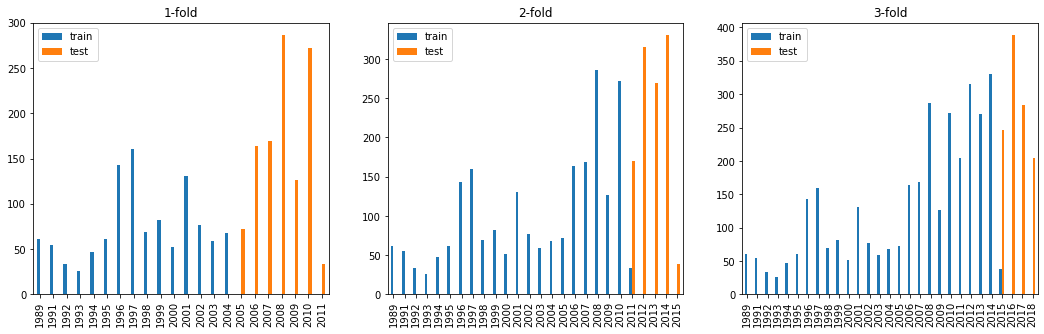

In [29]:
train_time, test_time = naive_timesplit_CV(model_RF, compounds_set_time, n_folds=3, get_sets=True)
plot_cv_data(train_time, test_time, 'Data selection in time-split CV (naive)')

* Time-split CV for fixed split points

Data selection in time-split CV (split by years)


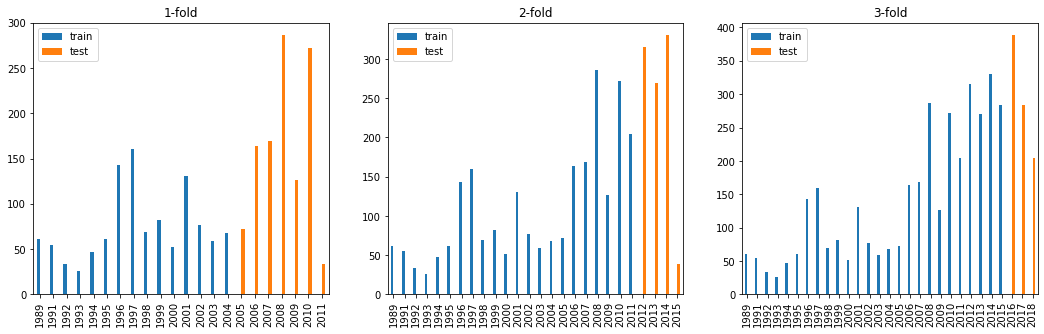

In [30]:
train_time, test_time = timesplit_CV(model_RF, compounds_set_time, n_folds=3, get_sets=True)
plot_cv_data(train_time, test_time, 'Data selection in time-split CV (split by years)')

In [ ]:
print(f"{N_FOLDS}-fold (naive) Time-Split Cross Validation performance: ")
for model in models:
    print("\n======= ")
    print(f"{model['label']}")
    acc,_,_,_ = naive_timesplit_CV(model["model"], compounds_set_time, n_folds=N_FOLDS)
    models_method.append(f"{model['label']}+Time-split CV (naive)")
    models_acc.append(acc)

In [31]:
print(f"{N_FOLDS}-fold Time-Split Cross Validation performance: ")
for model in models:
    print("\n======= ")
    print(f"{model['label']}")
    acc,_,_,_ = timesplit_CV(model["model"], compounds_set_time, n_folds=N_FOLDS)
    models_method.append(f"{model['label']}+Time-split CV")
    models_acc.append(acc)

10-fold Time-Split Cross Validation performance: 

Model_RF
Mean accuracy: 0.72 	and std : 0.04 
Mean sensitivity: 0.79 	and std : 0.07 
Mean specificity: 0.62 	and std : 0.10 
Mean AUC: 0.77 	and std : 0.05 


Model_SVM
Mean accuracy: 0.71 	and std : 0.08 
Mean sensitivity: 0.74 	and std : 0.13 
Mean specificity: 0.67 	and std : 0.14 
Mean AUC: 0.76 	and std : 0.05 



#### Performace on rational selection

* Butina Clustering

In [32]:
#Convert fingerprints to list
df_fingerprints = compound_df.fp_maccs.tolist()

# Run the clustering procedure for the dataset
clusters = cluster_fingerprints(df_fingerprints, cutoff=cut_off)# user-defined cut-off for similarity

Size of largets cluster:  52
Number of Singletons:  989
# clusters with only 1 compound:  989
# clusters with >5 compounds:  171
# clusters with >25 compounds:  10
# clusters with >100 compounds:  0


Number of clusters: 1710 from 4493 molecules at distance cut-off 0.10
Number of molecules in largest cluster: 52
Similarity between two random points in same cluster: 0.91
Similarity between two random points in different cluster: 0.64


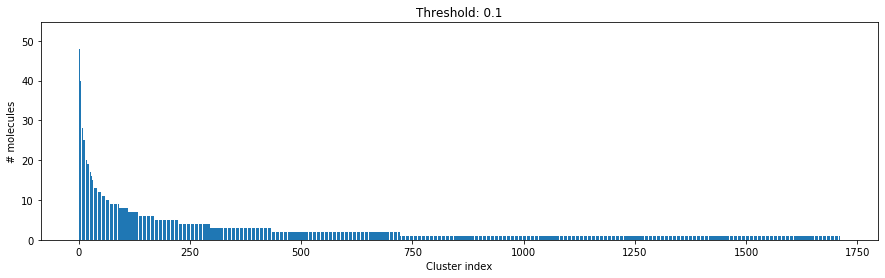

In [33]:
# Plot the size of the clusters - save plot
fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Cluster index")
ax.set_ylabel("# molecules")
ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters])
ax.set_title(f"Threshold: {cut_off:3.1f}")

print(f"Number of clusters: {len(clusters)} from {len(compound_df)} molecules at distance cut-off {cut_off:.2f}")
print("Number of molecules in largest cluster:", len(clusters[0]))
print(f"Similarity between two random points in same cluster: {DataStructs.TanimotoSimilarity(df_fingerprints[clusters[0][0]], df_fingerprints[clusters[0][1]]):.2f}")
print(f"Similarity between two random points in different cluster: {DataStructs.TanimotoSimilarity(df_fingerprints[clusters[0][0]], df_fingerprints[clusters[1][0]]):.2f}")

In [35]:
cluster_xtrain, cluster_ytrain, cluster_xtest, cluster_ytest = fingerprint_split(compound_df, clusters)
testsize = len(cluster_ytest)/(len(cluster_ytest)+len(cluster_ytrain))*100
print(f"Fit model on cluster-based split with train/test split of {round(100-testsize,2)}% to {round(testsize,2)}%")
for model in models:
    print("\n======= ")
    print(f"{model['label']}")
    model['model'].fit(cluster_xtrain, cluster_ytrain)
    # Calculate model performance results
    accuracy, sens, spec, auc = model_performance(model['model'], cluster_xtest, cluster_ytest, False)
    print('accuracy: ',accuracy)
    print('sensitivity: ', sens)
    print('specifity: ', spec)
    print('AUC score: ', auc)

Fit model on cluster-based split with train/test split of 77.99% to 22.01%

Model_RF
accuracy:  0.7654196157735086
sensitivity:  0.8845360824742268
specifity:  0.6507936507936508
AUC score:  0.8598429062346589

Model_SVM
accuracy:  0.7714863498483316
sensitivity:  0.8762886597938144
specifity:  0.6706349206349206
AUC score:  0.847555637375225


* K-means

In [66]:
features = cluster_features(compound_df, 31)
feat_xtrain, feat_ytrain, feat_xtest, feat_ytest = feature_split(compound_df, features)
testsize_ = len(feat_ytest)/(len(feat_ytest)+len(feat_ytrain))*100
print(f"Fit model on cluster-based split with train/test split of {round(100-testsize_,2)}% to {round(testsize_,2)}%")
for model in models:
    print("\n======= ")
    print(f"{model['label']}")
    model['model'].fit(feat_xtrain, feat_ytrain)
    # Calculate model performance results
    accuracy, sens, spec, auc = model_performance(model['model'], feat_xtest, feat_ytest, False)
    print('accuracy: ',accuracy)
    print('sensitivity: ', sens)
    print('specifity: ', spec)
    print('AUC score: ', auc)

Size of clusters:  [3484    1    1    4    1   19    1    4   28    8    1    2    6   29
    4    2   94    1    4    9  215   36   53    1    1    1   10  459
    5    7    2]
Fit model on cluster-based split with train/test split of 80.01% to 19.99%

Model_RF
accuracy:  0.7984409799554566
sensitivity:  0.8714285714285714
specifity:  0.6268656716417911
AUC score:  0.8226012793176973

Model_SVM
accuracy:  0.821826280623608
sensitivity:  0.9063492063492063
specifity:  0.6231343283582089
AUC score:  0.8250621890547263


#### Create test set with random split method with same ratio for rational split from Butina Clustering

In [73]:
#Divide the set into training and test set for random split
fingerprint_model = compound_df.fp_maccs.tolist()
label_model = compound_df.activity.tolist()

static_xtrain, static_xtest, static_ytrain, static_ytest = random_split(fingerprint_model, label_model,(testsize/100))

Fit model on single split with train/test split of 77.99%:22.01%

Model_RF
accuracy:  0.8169868554095046
sensitivity:  0.8853615520282186
specifity:  0.7251184834123223
AUC score:  0.8865004137515986

Model_SVM
accuracy:  0.8220424671385238
sensitivity:  0.9065255731922398
specifity:  0.7085308056872038
AUC score:  0.8812720980967426


### Discussion

#### Cross Validation methods

Accuracy per fold


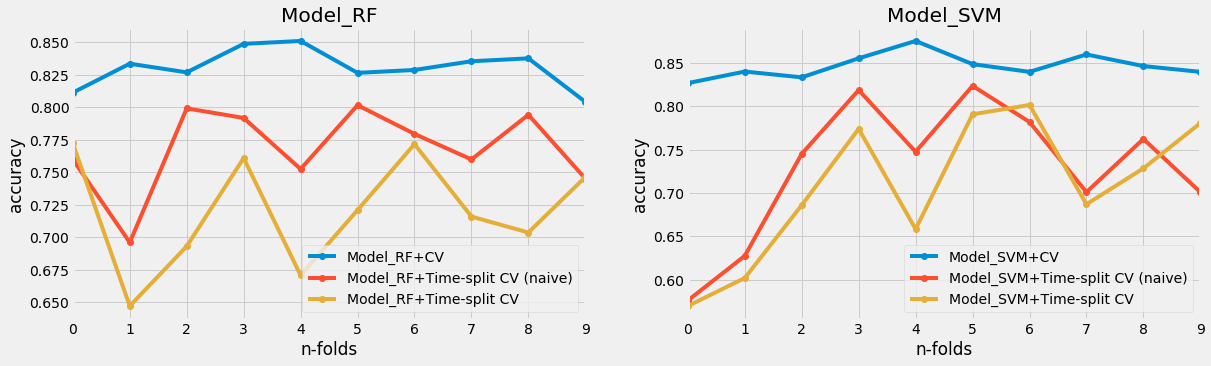

In [81]:
plot_cv_accuracy(models_acc, models_method, 'Accuracy per fold')

#### Single Random vs. Cluster-based Split

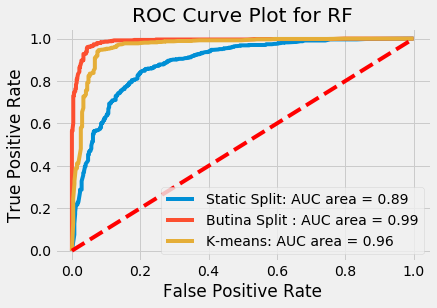

In [75]:
diff = abs(testsize-testsize_)
plot_roc_curves_for_singlemodel(model_RF, [static_xtest, cluster_xtest, feat_xtest], [static_ytest, cluster_ytest, feat_ytest], ['Static Split','Butina Split ','K-means'],'ROC Curve Plot for RF');

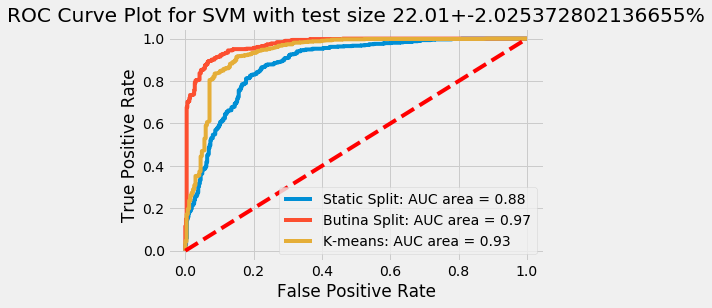

In [77]:
plot_roc_curves_for_singlemodel(model_SVM, [static_xtest, cluster_xtest, feat_xtest], [static_ytest, cluster_ytest, feat_ytest], ['Static Split','Butina Split','K-means'],'ROC Curve Plot for SVM with test size '+str(round(testsize,2))+'+-'+str(diff)+'%');

#### Visualization of the clusters

In [ ]:
print("Ten molecules from largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(compound_df.smiles[i]) for i in clusters[0][:10]],
    legends=[compound_df.molecule_chembl_id[i] for i in clusters[0][:10]],
    molsPerRow=5,
)

### Sources
[S1]
https://www.rdkit.org/docs/GettingStartedInPython.html#fingerprinting-and-molecular-similarity
[S2] Overview molecular descriptors
https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019)/6%3A_Molecular_Similarity/6.1%3A_Molecular_Descriptors
[S3] Scikit-learn Cross Validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
[S4] Scikit-learn Time-split Cross Validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

### Images
* https://chemaxon.com/news/chemaxon-us-user-group-meeting-ugm-san-diego-september-24-25-2013
* https://scikit-learn.org/stable/modules/cross_validation.html


### References

[] REVIEW OF EPIDERMAL GROWTH FACTOR RECEPTOR BIOLOGY

